# Computing for research day 2: Pandas


Samantha Lapp sglapp@uchicago.edu


(Most of the cells have been adapted from a notebook by Ivan Higuera-Mendieta)


Today we will focus on `pandas` and its multiple tricks to read and run operation in tabular formats. 

So first, what is pandas and why is it useful? 

Pandas is an open-source python library built on numpy arrays, and it's main advantage stems from two super convenient datatypes: the pandas series (pd.Series) and the pandas dataframe (pd.DataFrame). 

In [215]:
import pandas as pd


In [216]:
df = pd.read_csv('nrt_demodf.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'index'], axis = 1)
df

latlon     stationID  dyear  dmonth  dday state  \
0      (34.7699, -92.3117)  723403-13963   1996       6     9    AR   
1      (34.7699, -92.3117)  723403-13963   1996       6    11    AR   
2      (34.7699, -92.3117)  723403-13963   1996       6    14    AR   
3      (34.7699, -92.3117)  723403-13963   1996       6    19    AR   
4      (34.7699, -92.3117)  723403-13963   1996       6    20    AR   
...                    ...           ...    ...     ...   ...   ...   
45900  (45.2732, -93.2464)  726580-14922   2004       8    28    MN   
45901  (45.2732, -93.2464)  726580-14922   2004       9     1    MN   
45902  (45.2732, -93.2464)  726580-14922   2004       9     2    MN   
45903  (45.2732, -93.2464)  726580-14922   2004       9     5    MN   
45904  (45.2732, -93.2464)  726580-14922   2004       9    21    MN   

      county name   FIPS  dcount        date  ...  \
0         Pulaski   5119       1  1996-06-09  ...   
1         Pulaski   5119       2  1996-06-11  ...   
2         Pulaski   5119       1  1996-06-14  ...   
3         Pulaski   5119       2  1996-06-19  ...   
4         Pulaski   5119       2  1996-06-20  ...   
...           ...    ...     ...         ...  ...   
45900       Anoka  27003       1  2004-08-28  ...   
45901       Anoka  27003       1  2004-09-01  ...   
45902       Anoka  27003       1  2004-09-02  ...   
45903       Anoka  27003       1  2004-09-05  ...   
45904       Anoka  27003       2  2004-09-21  ...   

       is_part_of_multiday_excursion  is_dcount_excursion         city  \
0                                  0                    0  Little Rock   
1                                  0                    0  Little Rock   
2                                  0                    0  Little Rock   
3                                  0                    0  Little Rock   
4                                  0                    0  Little Rock   
...                              ...                  ...          ...   
45900                              0                    0  Minneapolis   
45901                              0                    0  Minneapolis   
45902                              0                    0  Minneapolis   
45903                              0                    0  Minneapolis   
45904                              0                    0  Minneapolis   

       ave_tmean  ave_rhmean  closely_precedes_edrday  maybe_event   tminlag1  \
0      27.063642   71.210602                        0            0  16.699997   
1      27.063642   71.210602                        0            0  16.099998   
2      27.063642   71.210602                        0            0  18.300003   
3      27.063642   71.210602                        0            0  21.099998   
4      27.063642   71.210602                        0            0  21.699997   
...          ...         ...                      ...          ...        ...   
45900  21.803373   69.095977                        0            0  13.300003   
45901  21.803373   69.095977                        0            0  15.000000   
45902  21.803373   69.095977                        0            0  16.699997   
45903  21.803373   69.095977                        0            0  21.699997   
45904  21.803373   69.095977                        0            0  21.099998   

        tmaxlag1        tv  
0      27.800003  1.000000  
1      24.400002  2.100000  
2      30.599998  1.099998  
3      32.199997  0.300001  
4      32.800003  0.549999  
...          ...       ...  
45900  25.599998  0.425001  
45901  22.199997  2.525000  
45902  30.599998  1.375000  
45903  31.099998  0.699999  
45904  28.900002  2.225000  

[45905 rows x 51 columns]

Wow, that was easy! Let's compare that process to the way that I first learned to open a csv file in a cs 101 course back in like 2015:

In [217]:
import csv
with open('nrt_demodf.csv') as csv_file:
    csvFile = csv.reader(csv_file, delimiter=',')
    
    for row in csvFile:
        print(row)

['', 'Unnamed: 0', 'Unnamed: 0.1', 'index', 'latlon', 'stationID', 'dyear', 'dmonth', 'dday', 'state', 'county name', 'FIPS', 'dcount', 'date', 'year', 'doy', 'longitude', 'latitude', 'elevation', 'tmax', 'dmax', 'vpmax', 'svpmax', 'wbmax', 'shmax', 'rhmax', 'tmin', 'dmin', 'vpmin', 'svpmin', 'wbmin', 'shmin', 'rhmin', 'tmean', 'dmean', 'vpmean', 'svpmean', 'wbmean', 'shmean', 'rhmean', 'trend', 'detrended_dcount', 'multiple', 'threshold', 'is_above_threshold', 'is_part_of_multiday_excursion', 'is_dcount_excursion', 'city', 'ave_tmean', 'ave_rhmean', 'closely_precedes_edrday', 'maybe_event', 'tminlag1', 'tmaxlag1', 'tv']
['0', '1', '1', '24', '(34.7699, -92.3117)', '723403-13963', '1996', '6', '9', 'AR', 'Pulaski', '5119', '1', '1996-06-09', '1996.0', '161.0', '-92.239', '34.727', '78.6', '24.400001525878903', '16.099998474121094', '18.373130798339844', '30.695816040039062', '18.23230743408203', '11.475547790527344', '89.65006256103516', '16.099998474121094', '12.199996948242188', '14.

['1229', '1231', '1231', '29197', '(33.3488, -112.4912)', '722780-23183', '1998', '8', '18', 'AZ', 'Maricopa', '4013', '21', '1998-08-18', '1998.0', '230.0', '-112.004', '33.428', '337.4', '39.400001525878906', '24.400001525878903', '30.692367553710938', '71.78450775146484', '25.1240234375', '19.909744262695312', '84.71151733398438', '26.099998474121094', '13.300003051757812', '15.333488464355469', '33.9595947265625', '20.843338012695312', '9.907501220703123', '23.84899139404297', '30.279165267944336', '18.041667302449543', '20.951722145080566', '44.58506107330322', '22.222717603047688', '13.52519448598226', '51.140195528666176', '22.14093222946072', '-1.140932229460713', '1.75', '15.016408787275934', '0', '0', '0', 'Phoenix', '34.180418959731064', '27.3755139507959', '0', '0', '28.30000305175781', '38.900001525878906', '0.4250011444091797']
['1230', '1232', '1232', '29221', '(33.3488, -112.4912)', '722780-23183', '1998', '8', '19', 'AZ', 'Maricopa', '4013', '25', '1998-08-19', '1998.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['18261', '18274', '18274', '427226', '(38.1872, -85.6595)', '724230-93821', '2002', '9', '25', 'KY', 'Jefferson', '21111', '6', '2002-09-25', '2002.0', '268.0', '-85.739', '38.181', '148.7', '22.80000305175781', '15.0', '17.121803283691406', '27.87480926513672', '17.28551483154297', '10.715080261230469', '80.54950714111328', '14.400001525878906', '8.900001525878906', '11.44976043701172', '16.471572875976562', '12.51616668701172', '7.121879577636719', '41.075645446777344', '18.63333320617676', '11.624999046325684', '13.79731273651123', '21.93018245697021', '14.594086647033691', '8.598770141601562', '64.97806708017985', '8.29486909727134', '-2.29486909727134', '1.75', '9.004883195344627', '0', '0', '0', 'Louisville', '25.20911897647668', '69.34944555377007', '0', '0', '11.699996948242188', '25.599998474121094', '0.0249977111816406']
['18262', '18275', '18275', '427250', '(38.1872, -85.6595)', '724230-93821', '2002', '9', '26', 'KY', 'Jefferson', '21111', '5', '2002-09-26', '2002.0', '2

['19670', '19685', '19685', '460855', '(39.2531, -76.5758)', '724060-93721', '1995', '8', '8', 'MD', 'Baltimore City', '24510', '8', '1995-08-08', '1995.0', '220.0', '-76.684', '39.173', '47.6', '25.599998474121094', '16.099998474121094', '18.37409210205078', '32.973846435546875', '19.303543090820312', '11.321372985839844', '89.77922821044922', '17.800003051757812', '12.800003051757812', '14.842811584472656', '20.465797424316406', '16.415298461914062', '9.120155334472656', '51.92838287353516', '21.733334223429363', '15.245832761128744', '17.424416224161785', '26.450427055358887', '17.70877170562744', '10.724521319071451', '68.10825951894124', '6.160837315540359', '1.839162684459641', '1.75', '7.724520623112824', '0', '0', '0', 'Baltimore', '24.005235831171788', '71.12169252669948', '0', '0', '20.599998474121094', '25.0', '0.5499992370605469']
['19671', '19686', '19686', '460879', '(39.3087, -76.6163)', '724060-93721', '1995', '8', '8', 'MD', 'Baltimore City', '24510', '8', '1995-08-08'

['20687', '20702', '20702', '485011', '(39.3087, -76.6163)', '724060-93721', '1999', '9', '16', 'MD', 'Baltimore City', '24510', '6', '1999-09-16', '1999.0', '259.0', '-76.684', '39.173', '47.6', '20.599998474121094', '19.400001525878903', '22.62152099609375', '24.366912841796875', '19.78460693359375', '14.128807067871094', '96.93069458007812', '16.699996948242188', '13.300003051757812', '15.33477020263672', '19.08819580078125', '14.645248413085938', '9.665534973144531', '80.33639526367188', '18.833333969116207', '17.600001017252602', '20.30140495300293', '21.881898880004883', '18.032514572143555', '12.750825881958008', '92.60656452178956', '6.2709204326776335', '-0.2709204326776335', '1.75', '7.724520623112824', '0', '0', '0', 'Baltimore', '24.005235831171788', '71.12169252669948', '0', '0', '16.699996948242188', '20.599998474121094', '0.0']
['20688', '20703', '20703', '485035', '(39.2531, -76.5758)', '724060-93721', '1999', '9', '18', 'MD', 'Baltimore City', '24510', '8', '1999-09-18

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['39657', '39684', '39684', '934182', '(30.4581, -84.2778)', '722140-93805', '2000', '7', '17', 'FL', 'Leon', '12073', '2', '2000-07-17', '2000.0', '199.0', '-84.353', '30.393', '16.8', '37.80000305175781', '27.199996948242188', '36.23658752441406', '65.86554718017578', '27.199996948242188', '22.619796752929688', '100.0', '26.699996948242188', '19.400001525878903', '22.62198638916016', '35.18775939941406', '23.30482482910156', '14.014259338378906', '36.46407318115234', '30.924999237060547', '23.3249994913737', '28.92099496592646', '46.348426818847656', '25.57675436268682', '17.986729165782098', '67.94527601159137', '1.980908918216553', '0.0190910817834473', '1.75', '3.8064480572000425', '0', '0', '0', 'Tallahassee', '26.822272418194974', '77.04054332204939', '0', '0', '26.699996948242188', '38.900001525878906', '0.2749996185302734']
['39658', '39685', '39685', '934205', '(30.4581, -84.2778)', '722140-93805', '2000', '7', '18', 'FL', 'Leon', '12073', '2', '2000-07-18', '2000.0', '200.0'

['41025', '41053', '41053', '966661', '(39.7816, -86.1384)', '724380-93819', '2000', '6', '29', 'IN', 'Marion', '18097', '3', '2000-06-29', '2000.0', '181.0', '-86.282', '39.725', '241.1', '25.0', '15.599998474121094', '17.79369354248047', '31.814186096191406', '17.90533447265625', '11.32221221923828', '90.31108856201172', '16.099998474121094', '12.800003051757812', '14.841102600097656', '18.3719482421875', '14.748069763183594', '9.42255401611328', '48.19963073730469', '20.758333206176754', '13.954168319702148', '16.027723630269367', '24.9422238667806', '16.61170260111491', '10.187481562296549', '66.79685084025066', '4.427854340047861', '-1.427854340047861', '1.75', '6.70600017161248', '0', '0', '0', 'Indianapolis', '23.30193707964532', '72.4456273195892', '0', '0', '15.599998474121094', '24.400001525878903', '0.2749996185302734']
['41026', '41054', '41054', '966685', '(39.7816, -86.1384)', '724380-93819', '2000', '6', '30', 'IN', 'Marion', '18097', '7', '2000-06-30', '2000.0', '182.0'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['45656', '45688', '45688', '1077403', '(45.2732, -93.2464)', '726580-14922', '1999', '8', '24', 'MN', 'Anoka', '27003', '1', '1999-08-24', '1999.0', '236.0', '-93.229', '44.883', '265.8', '25.0', '18.900001525878903', '21.9253158569336', '31.81390380859375', '20.50060272216797', '14.008918762207031', '96.90485382080078', '18.30000305175781', '17.199996948242188', '19.702125549316406', '21.11659240722656', '17.77959442138672', '12.635360717773438', '64.32184600830078', '21.17916679382324', '17.920835812886555', '20.62403964996338', '25.43429597218832', '19.002922693888348', '13.20450528462728', '82.32622241973877', '1.2817452362256512', '-0.2817452362256512', '1.75', '-0.241034230015641', '0', '0', '0', 'Minneapolis', '21.803373006285813', '69.09597682543496', '0', '0', '19.400001525878903', '25.0', '0.2749996185302734']
['45657', '45689', '45689', '1077427', '(45.2732, -93.2464)', '726580-14922', '1999', '8', '25', 'MN', 'Anoka', '27003', '1', '1999-08-25', '1999.0', '237.0', '-93.22

This is the same data, but in a different format. And it looks disgusting. To do any data cleaning or column operations I would have to index these rows the old-fashioned way (like indexing a numpy array, as we'll discuss in upcoming days). That sounds like a lot of opportunities to get stuck! 

Pro tip: don't reinvent the wheel! Pandas makes dealing with tabular (i.e. data represented in 2D tables/arrays) a *lot* easier. 




In this session we will learn some `pandas`: 
 1. Data structures: `pd.Series`, `pd.Index`, `pd.DataFrames`
 2. Data wrangling: filtering and cleaning
 3. *split-apply-combine*
 4. Visualization using pandas

Let's load a few more libraries we'll find useful:

In [218]:
#I'm importing pandas again, which isn't necessary, but when I'm coding for research I like to keep all
#my imports in one cell

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt         



## Section 1. Data structures in `pandas`

We have several data structure in `pandas`. As you will see, some of this structures are similar to `numpy` arrays. In essence, they are indexed arrays with similar functionality as our good old `ndarrays`.



### 1.1. Series

Let's explore `pd.Series` and how to slice it:

In [219]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], name='Temperature')
temp

0    40.0
1    41.0
2    39.0
3    39.0
4    19.0
5    15.0
6    11.0
Name: Temperature, dtype: float64

Contrast the pd.Series with a regular numpy array. The key advantages a pd series has over a regular numpy array are
1. each row has a unique index
2. a series caries a name label

In [220]:
np.array([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0])

array([40., 41., 39., 39., 19., 15., 11.])

In [221]:
temp.index

RangeIndex(start=0, stop=7, step=1)

In [222]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], 
                 index=['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                 name='Temperature')
temp


a    40.0
b    41.0
c    39.0
d    39.0
e    19.0
f    15.0
g    11.0
Name: Temperature, dtype: float64

In [223]:
temp['a':'c']

a    40.0
b    41.0
c    39.0
Name: Temperature, dtype: float64

We can use our `index` property to slice our `pd.Series` and filter data. The `index` object will be ubiquous within `pandas` and has important properties and functions to make our life easier. Indices can be complex, include more than one attribute and data type. For instance:

In [224]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], 
                 index=pd.date_range('2020-01-01', '2020-01-07', freq='D'),
                 name='Temperature')
temp

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
2020-01-05    19.0
2020-01-06    15.0
2020-01-07    11.0
Freq: D, Name: Temperature, dtype: float64

In [225]:
temp['2020-01-01':'2020-01-04']

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
Freq: D, Name: Temperature, dtype: float64

In [226]:
# .loc is an accesor that allow us to use the index of any pandas object. Is useful to avoid confusion. 
temp.loc['2020-01-01':'2020-01-04']

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
Freq: D, Name: Temperature, dtype: float64

In [227]:
# You can also index the typical way (i.e. index like you would a list or numpy array) by using .iloc
temp.iloc[0:2]

2020-01-01    40.0
2020-01-02    41.0
Freq: D, Name: Temperature, dtype: float64

In [228]:
temp[(temp < 20)]

2020-01-05    19.0
2020-01-06    15.0
2020-01-07    11.0
Freq: D, Name: Temperature, dtype: float64

In [229]:
avg_temp = temp.mean()
print(f'The average temperature in Chicago this week is: {avg_temp}')

The average temperature in Chicago this week is: 29.142857142857142


#### Check-in [# 1]

We have covered how to play with `pd.Series`, now with the data generated in the next cell, calculate the mean temperature over the course of the year. 



In [230]:
temp_tropical = np.random.default_rng().normal(20, 5, 366)
day_objs = pd.date_range('2020-01-01', '2020-12-31', freq='D')


"""
Use this data and use this block to code your answer
"""


'\nUse this data and use this block to code your answer\n'

We can see that `pd.Series` are generalized one dimensional numpy arrays that also have some `dict` features (index work as keys). Now, let's jump to `DataFrames`. 

### 1.2 DataFrames

`DataFrames` are a collection of `Series`:  

In [231]:
temperature = pd.Series({'2020-01-01': 40.0,
                         '2020-01-02': 41.0,
                         '2020-01-03': 39.0,
                         '2020-01-04': 39.0,
                         '2020-01-05': 19.0,
                         '2020-01-06': 15.0,
                         '2020-01-07': 11.0})

rainfall = pd.Series({'2020-01-01': 2.0, 
                      '2020-01-02': 0.0, 
                      '2020-01-03': 0.1, 
                      '2020-01-04': 0.0, 
                      '2020-01-05': 0.4, 
                      '2020-01-06': 0.7, 
                      '2020-01-08': 0.8})

df = pd.DataFrame({
    'temp': temperature,
    'rainfall': rainfall
})

df

temp  rainfall
2020-01-01  40.0       2.0
2020-01-02  41.0       0.0
2020-01-03  39.0       0.1
2020-01-04  39.0       0.0
2020-01-05  19.0       0.4
2020-01-06  15.0       0.7
2020-01-07  11.0       NaN
2020-01-08   NaN       0.8

In [232]:
df['temp']

2020-01-01    40.0
2020-01-02    41.0
2020-01-03    39.0
2020-01-04    39.0
2020-01-05    19.0
2020-01-06    15.0
2020-01-07    11.0
2020-01-08     NaN
Name: temp, dtype: float64

In [233]:
df.temp.mean()

29.142857142857142

As you can see in the above cells, you can select columns by either slicing using the column name: `df[<column name>]`, or by using the column name as a key (just as a `dict`!): `df.<column name>`. But **BEWARE**, if column is called `mean`, `pop`, or any other `pandas` method, you might have conflicts. 

In [234]:
df['anomaly'] = df['temp'] - df.temp.mean()
df

temp  rainfall    anomaly
2020-01-01  40.0       2.0  10.857143
2020-01-02  41.0       0.0  11.857143
2020-01-03  39.0       0.1   9.857143
2020-01-04  39.0       0.0   9.857143
2020-01-05  19.0       0.4 -10.142857
2020-01-06  15.0       0.7 -14.142857
2020-01-07  11.0       NaN -18.142857
2020-01-08   NaN       0.8        NaN

Creating new columns is easy! 

Let us remember that a `pd.DataFrame` is not very different that a multidimensional `np.array`

If you want to switch from DataFrame to a numpy array though, you an use either .values or .to_numpy():

In [235]:
df.values

array([[ 40.        ,   2.        ,  10.85714286],
       [ 41.        ,   0.        ,  11.85714286],
       [ 39.        ,   0.1       ,   9.85714286],
       [ 39.        ,   0.        ,   9.85714286],
       [ 19.        ,   0.4       , -10.14285714],
       [ 15.        ,   0.7       , -14.14285714],
       [ 11.        ,          nan, -18.14285714],
       [         nan,   0.8       ,          nan]])

In [236]:
df.values.T

array([[ 40.        ,  41.        ,  39.        ,  39.        ,
         19.        ,  15.        ,  11.        ,          nan],
       [  2.        ,   0.        ,   0.1       ,   0.        ,
          0.4       ,   0.7       ,          nan,   0.8       ],
       [ 10.85714286,  11.85714286,   9.85714286,   9.85714286,
        -10.14285714, -14.14285714, -18.14285714,          nan]])

In [237]:
df.to_numpy()

array([[ 40.        ,   2.        ,  10.85714286],
       [ 41.        ,   0.        ,  11.85714286],
       [ 39.        ,   0.1       ,   9.85714286],
       [ 39.        ,   0.        ,   9.85714286],
       [ 19.        ,   0.4       , -10.14285714],
       [ 15.        ,   0.7       , -14.14285714],
       [ 11.        ,          nan, -18.14285714],
       [         nan,   0.8       ,          nan]])

In [238]:
df.to_numpy().T

array([[ 40.        ,  41.        ,  39.        ,  39.        ,
         19.        ,  15.        ,  11.        ,          nan],
       [  2.        ,   0.        ,   0.1       ,   0.        ,
          0.4       ,   0.7       ,          nan,   0.8       ],
       [ 10.85714286,  11.85714286,   9.85714286,   9.85714286,
        -10.14285714, -14.14285714, -18.14285714,          nan]])

#### Check in [# 2]

We have learn how to slice data in our manually created `DataFrame` (`df`). Now, calculate rainfall anomaly and return the dates where the anomaly is negative. 

In [239]:
"""
Your code for the challenge should go here!
"""


'\nYour code for the challenge should go here!\n'

As we did above with the `pd.Series`, the same methods works for `pd.DataFrames`. You can use `loc` to use the index (both index of columns and rows). For clarity, let us see that: 
  - Index: row names
  - Columns: column names (index of columns!)


In [240]:
df.loc['2020-01-01':'2020-01-03', 'anomaly']

2020-01-01    10.857143
2020-01-02    11.857143
2020-01-03     9.857143
Name: anomaly, dtype: float64

Another option is to use Python indices (naive indices?)

In [241]:
df.iloc[0:5, 1]

2020-01-01    2.0
2020-01-02    0.0
2020-01-03    0.1
2020-01-04    0.0
2020-01-05    0.4
Name: rainfall, dtype: float64

You can also use logic indexing (my preference) , just as a fast way to filter our data

In [242]:
df[df.anomaly > 0]

temp  rainfall    anomaly
2020-01-01  40.0       2.0  10.857143
2020-01-02  41.0       0.0  11.857143
2020-01-03  39.0       0.1   9.857143
2020-01-04  39.0       0.0   9.857143

## Section 2. Data wrangling: An example on how to open data using `pandas`
Let's jump now to how to read and write data from `pandas`. Pandas is extremely flexible and can read a vast array of data formats, including challenging text formats, and even hierarchical formats as `json`. The most widely format for tabular data is CSV (comma-separated-values) or any sort of text files with specific separators (can be a `tab`, or basically anything). 

We saw in out last session an example of reading a CSV file from disk. But we can also read CSV files from any place on the internet, or even compressed files. `pandas` will handle everything for us. 

For this purpose we will use the [NOAA Integration Surface Database](https://www.ncdc.noaa.gov/isd). This data source contain more than 35,000 weather stations around the world. Data is stored in a FTP server (but also a HTML server) and files are stored by year and station. 

Before jumping into data, let's explore the stations available to us by checking the [station metadata](https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.txt).


Wow, this file is not our normal CSV file, how to open this? One amazing resource of `pandas` is its documentation, is incredibly complete and clear. Let's see the `pd.read_csv` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 


### 2.1 Reading tabular data from an URL

In [243]:
url_inventory_stations = 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-history.csv'
station_inventory = pd.read_csv(url_inventory_stations,
                                parse_dates=['BEGIN', 'END'],
                                dtype=str)
station_inventory.head()

USAF   WBAN STATION NAME CTRY STATE ICAO      LAT       LON  ELEV(M)  \
0  007018  99999   WXPOD 7018  NaN   NaN  NaN  +00.000  +000.000  +7018.0   
1  007026  99999   WXPOD 7026   AF   NaN  NaN  +00.000  +000.000  +7026.0   
2  007070  99999   WXPOD 7070   AF   NaN  NaN  +00.000  +000.000  +7070.0   
3  008260  99999    WXPOD8270  NaN   NaN  NaN  +00.000  +000.000  +0000.0   
4  008268  99999    WXPOD8278   AF   NaN  NaN  +32.950  +065.567  +1156.7   

       BEGIN        END  
0 2011-03-09 2013-07-30  
1 2012-07-13 2017-08-22  
2 2014-09-23 2015-09-26  
3 2005-01-01 2012-07-31  
4 2010-05-19 2012-03-23

### 2.2. Cleaning missing data and renaming columns

Just as in `numpy`, we have missing data. We can drop missing data in `pandas` using the `dropna` method and controlling which rows (or columns) we need to drop. 

In [244]:
station_inventory =  station_inventory.dropna(how='all')

# We can also change the names
station_inventory.rename(columns={
    'USAF': 'usaf',
    'WBAN': 'wban',
    'STATION NAME': 'station_name',
    'CTRY': 'country',
    'STATE': 'state',
    'ICAO': 'icao_code',
    'LAT': 'lat',
    'LON': 'lon',
    'ELEV(M)': 'elevation',
    'BEGIN': 'start_date_service',
    'END': 'end_date_service'
}, inplace=True)

station_inventory.head()

usaf   wban station_name country state icao_code      lat       lon  \
0  007018  99999   WXPOD 7018     NaN   NaN       NaN  +00.000  +000.000   
1  007026  99999   WXPOD 7026      AF   NaN       NaN  +00.000  +000.000   
2  007070  99999   WXPOD 7070      AF   NaN       NaN  +00.000  +000.000   
3  008260  99999    WXPOD8270     NaN   NaN       NaN  +00.000  +000.000   
4  008268  99999    WXPOD8278      AF   NaN       NaN  +32.950  +065.567   

  elevation start_date_service end_date_service  
0   +7018.0         2011-03-09       2013-07-30  
1   +7026.0         2012-07-13       2017-08-22  
2   +7070.0         2014-09-23       2015-09-26  
3   +0000.0         2005-01-01       2012-07-31  
4   +1156.7         2010-05-19       2012-03-23

### 2.3. Indices and Slicing

We have a plethora of ways to select data in `pandas`. Some are more efficient than others. Let's explore some of them in this section, and to differentiate between them let's also introduce indexing :) 

In [245]:
station_inventory['station_code'] = station_inventory['usaf'] + station_inventory['wban']
station_inventory.head()

usaf   wban station_name country state icao_code      lat       lon  \
0  007018  99999   WXPOD 7018     NaN   NaN       NaN  +00.000  +000.000   
1  007026  99999   WXPOD 7026      AF   NaN       NaN  +00.000  +000.000   
2  007070  99999   WXPOD 7070      AF   NaN       NaN  +00.000  +000.000   
3  008260  99999    WXPOD8270     NaN   NaN       NaN  +00.000  +000.000   
4  008268  99999    WXPOD8278      AF   NaN       NaN  +32.950  +065.567   

  elevation start_date_service end_date_service station_code  
0   +7018.0         2011-03-09       2013-07-30  00701899999  
1   +7026.0         2012-07-13       2017-08-22  00702699999  
2   +7070.0         2014-09-23       2015-09-26  00707099999  
3   +0000.0         2005-01-01       2012-07-31  00826099999  
4   +1156.7         2010-05-19       2012-03-23  00826899999

In [246]:
station_inventory.set_index('station_code', inplace=True)
station_inventory.head()

usaf   wban station_name country state icao_code      lat  \
station_code                                                                
00701899999   007018  99999   WXPOD 7018     NaN   NaN       NaN  +00.000   
00702699999   007026  99999   WXPOD 7026      AF   NaN       NaN  +00.000   
00707099999   007070  99999   WXPOD 7070      AF   NaN       NaN  +00.000   
00826099999   008260  99999    WXPOD8270     NaN   NaN       NaN  +00.000   
00826899999   008268  99999    WXPOD8278      AF   NaN       NaN  +32.950   

                   lon elevation start_date_service end_date_service  
station_code                                                          
00701899999   +000.000   +7018.0         2011-03-09       2013-07-30  
00702699999   +000.000   +7026.0         2012-07-13       2017-08-22  
00707099999   +000.000   +7070.0         2014-09-23       2015-09-26  
00826099999   +000.000   +0000.0         2005-01-01       2012-07-31  
00826899999   +065.567   +1156.7         2010-05-19       2012-03-23

#### Life lesson [# 0]

_Why indices?_ Well, there's no clear rule on this. In theory, indices in `DataFrames` work like keys of a dictionary. So, using the indices is comparable to slicing a `dict`. This is more efficient than slice a list of data values. Hence, indices can help us to handle data faster. 

Another reason to use indices is to make use of `pandas` ploting methods. 

This similar concept exists on SQL hash-based indexing, which is extremely powerful! 

We can then slice using the `Index` ( using `loc`):

In [247]:
station_inventory.loc['00702699999']

usaf                               007026
wban                                99999
station_name                   WXPOD 7026
country                                AF
state                                 NaN
icao_code                             NaN
lat                               +00.000
lon                              +000.000
elevation                         +7026.0
start_date_service    2012-07-13 00:00:00
end_date_service      2017-08-22 00:00:00
Name: 00702699999, dtype: object

Or we can use the pythonic index (row order) with `iloc`:

In [248]:
station_inventory.iloc[0]

usaf                               007018
wban                                99999
station_name                   WXPOD 7018
country                               NaN
state                                 NaN
icao_code                             NaN
lat                               +00.000
lon                              +000.000
elevation                         +7018.0
start_date_service    2011-03-09 00:00:00
end_date_service      2013-07-30 00:00:00
Name: 00701899999, dtype: object

In [249]:
station_inventory.loc['00701899999':'00826899999']

usaf   wban station_name country state icao_code      lat  \
station_code                                                                
00701899999   007018  99999   WXPOD 7018     NaN   NaN       NaN  +00.000   
00702699999   007026  99999   WXPOD 7026      AF   NaN       NaN  +00.000   
00707099999   007070  99999   WXPOD 7070      AF   NaN       NaN  +00.000   
00826099999   008260  99999    WXPOD8270     NaN   NaN       NaN  +00.000   
00826899999   008268  99999    WXPOD8278      AF   NaN       NaN  +32.950   

                   lon elevation start_date_service end_date_service  
station_code                                                          
00701899999   +000.000   +7018.0         2011-03-09       2013-07-30  
00702699999   +000.000   +7026.0         2012-07-13       2017-08-22  
00707099999   +000.000   +7070.0         2014-09-23       2015-09-26  
00826099999   +000.000   +0000.0         2005-01-01       2012-07-31  
00826899999   +065.567   +1156.7         2010-05-19       2012-03-23

We can get rid of `Index` and change it to another one (or simply not use one -- Pandas uses a `RangeIndex` by default). 

In [250]:
station_inventory.reset_index()

station_code    usaf   wban  \
0      00701899999  007018  99999   
1      00702699999  007026  99999   
2      00707099999  007070  99999   
3      00826099999  008260  99999   
4      00826899999  008268  99999   
...            ...     ...    ...   
29611  A0735500241  A07355  00241   
29612  A0735700182  A07357  00182   
29613  A0735900240  A07359  00240   
29614  A5125500445  A51255  00445   
29615  A5125600451  A51256  00451   

                                            station_name country state  \
0                                             WXPOD 7018     NaN   NaN   
1                                             WXPOD 7026      AF   NaN   
2                                             WXPOD 7070      AF   NaN   
3                                              WXPOD8270     NaN   NaN   
4                                              WXPOD8278      AF   NaN   
...                                                  ...     ...   ...   
29611                          VIROQUA MUNICIPAL AIRPORT      US    WI   
29612  ELBOW LAKE MUNICIPAL PRIDE OF THE PRAIRIE AIRPORT      US    MN   
29613                               IONIA COUNTY AIRPORT      US    MI   
29614                        DEMOPOLIS MUNICIPAL AIRPORT      US    AL   
29615       BRANSON WEST MUNICIPAL EMERSON FIELD AIRPORT      US    MO   

      icao_code      lat       lon elevation start_date_service  \
0           NaN  +00.000  +000.000   +7018.0         2011-03-09   
1           NaN  +00.000  +000.000   +7026.0         2012-07-13   
2           NaN  +00.000  +000.000   +7070.0         2014-09-23   
3           NaN  +00.000  +000.000   +0000.0         2005-01-01   
4           NaN  +32.950  +065.567   +1156.7         2010-05-19   
...         ...      ...       ...       ...                ...   
29611      KY51  +43.579  -090.913   +0394.1         2014-07-31   
29612      KY63  +45.986  -095.992   +0367.3         2014-07-31   
29613      KY70  +42.938  -085.061   +0249.0         2014-07-31   
29614      KDYA  +32.464  -087.954   +0034.1         2014-07-31   
29615      KFWB  +36.699  -093.402   +0411.2         2014-07-31   

      end_date_service  
0           2013-07-30  
1           2017-08-22  
2           2015-09-26  
3           2012-07-31  
4           2012-03-23  
...                ...  
29611       2022-08-28  
29612       2022-08-28  
29613       2022-08-28  
29614       2022-08-29  
29615       2022-08-28  

[29616 rows x 12 columns]

Just to show the power of indices, let's make the `start_date_service` our new `Index`

In [251]:
station_inventory = station_inventory.reset_index().set_index('start_date_service')

In [252]:
##The below line avoids the warning in the following .loc[] cell

#station_inventory = station_inventory.sort_values(by = 'start_date_service')


In [253]:
station_inventory.loc['2020-01-01':'2020-08-01']

/Users/samanthalapp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


station_code    usaf   wban              station_name  \
start_date_service                                                         
2020-06-19          37642099999  376420  99999                     TOVUZ   
2020-07-27          40573599999  405735  99999         AHMED AL JABER AB   
2020-02-13          42097099999  420970  99999                  BHATINDA   
2020-04-30          72045799999  720457  99999       WENDELL H FORD ARPT   
2020-01-10          72048103817  720481  03817        MALDEN FAA AIRPORT   
2020-07-13          72070853849  720708  53849                   RANGE B   
2020-06-24          72234999999  722349  99999             PICAYUNE MUNI   
2020-05-06          93021099999  930210  99999         KERIKERI AERO AWS   
2020-05-06          93057099999  930570  99999       WHANGAREI AERODROME   
2020-07-21          94406099999  944060  99999             BILLABONG ASA   
2020-07-01          94590099999  945900  99999   INNER RECIPROCAL MARKER   
2020-06-24          94591099999  945910  99999  BANANA BANK NORTH BEACON   
2020-07-21          95761099999  957610  99999  HOLSWORTHY AERODROME AWS   
2020-03-25          98742099999  987420  99999                  PAGADIAN   

                   country state icao_code      lat       lon elevation  \
start_date_service                                                        
2020-06-19              AJ   NaN       NaN  +41.100  +043.550   +0333.0   
2020-07-27              KU   NaN      OKAJ  +28.935  +047.792   +0124.7   
2020-02-13              IN   NaN       NaN  +30.167  +074.583   +0211.0   
2020-04-30              US    KY      KCPF  +37.387  -083.262   +0383.0   
2020-01-10              US    MO      KMAW  +36.600  -089.983   +0092.1   
2020-07-13              US    MS      KNJW  +32.800  -088.833   +0164.6   
2020-06-24              US    MS      KMJD  +30.487  -089.651   +0017.1   
2020-05-06              NZ   NaN       NaN  -35.250  +173.900   +0151.0   
2020-05-06              NZ   NaN       NaN  -35.767  +174.367   +0038.0   
2020-07-21              AS   NaN       NaN  -26.817  +114.617   +0136.0   
2020-07-01              AS   NaN       NaN  -27.250  +153.250   +0020.0   
2020-06-24              AS   NaN       NaN  -27.533  +153.333   +0007.0   
2020-07-21              AS   NaN       NaN  -33.983  +150.950   +0068.8   
2020-03-25              RP   NaN      RPMP  +07.827  +123.458   +0001.5   

                   end_date_service  
start_date_service                   
2020-06-19               2020-06-19  
2020-07-27               2021-09-09  
2020-02-13               2020-02-13  
2020-04-30               2022-08-27  
2020-01-10               2020-04-30  
2020-07-13               2022-08-28  
2020-06-24               2022-08-27  
2020-05-06               2022-08-27  
2020-05-06               2022-08-27  
2020-07-21               2022-08-27  
2020-07-01               2022-02-25  
2020-06-24               2022-02-25  
2020-07-21               2022-08-27  
2020-03-25               2020-05-05

We can also use logic statements to slice our `DataFrame`:

In [254]:
station_inventory[(station_inventory.country == "US")].head()

station_code    usaf   wban station_name country state  \
start_date_service                                                          
2008-07-21          62101099999  621010  99999  MOORED BUOY      US   NaN   
2004-11-18          62111099999  621110  99999  MOORED BUOY      US   NaN   
2004-07-26          62113099999  621130  99999  MOORED BUOY      US   NaN   
2004-08-29          62116099999  621160  99999  MOORED BUOY      US   NaN   
2004-07-26          62117099999  621170  99999  MOORED BUOY      US   NaN   

                   icao_code      lat       lon elevation end_date_service  
start_date_service                                                          
2008-07-21               NaN  +50.600  -002.933   -0999.0       2008-07-21  
2004-11-18               NaN  +58.900  -000.200   -0999.0       2004-11-18  
2004-07-26               NaN  +58.400  +000.300   -0999.0       2004-07-26  
2004-08-29               NaN  +58.100  +001.800   -0999.0       2004-08-29  
2004-07-26               NaN  +57.900  +000.100   -0999.0       2004-07-26

`Pandas` has some built logics:

In [255]:
list_states = ['CA', 'MN', 'IL']
station_inventory[(station_inventory.state.isin(list_states))].head()

station_code    usaf   wban                  station_name  \
start_date_service                                                             
1964-07-15          69002093218  690020  93218  JOLON HUNTER LIGGETT MIL RES   
2003-07-02          69002099999  690020  99999  JOLON HUNTER LIGGETT MIL RES   
1960-04-04          69007093217  690070  93217                 FRITZSCHE AAF   
2003-06-16          69008099999  690080  99999                    TARIN KOWT   
1989-01-01          69014093101  690140  93101                  EL TORO MCAS   

                   country state icao_code      lat       lon elevation  \
start_date_service                                                        
1964-07-15              US    CA      KHGT  +36.000  -121.233   +0317.0   
2003-07-02              US    CA      KHGT  +36.000  -121.233   +0317.0   
1960-04-04              US    CA      KOAR  +36.683  -121.767   +0043.0   
2003-06-16              AF    CA      KQA7  +32.600  +065.870   +1380.0   
1989-01-01              US    CA      KNZJ  +33.667  -117.733   +0116.7   

                   end_date_service  
start_date_service                   
1964-07-15               1997-04-01  
2003-07-02               2003-08-01  
1960-04-04               1993-08-31  
2003-06-16               2003-06-24  
1989-01-01               1999-06-30

In [256]:
station_inventory[(station_inventory.state.isin(list_states))].state.value_counts()

CA    504
MN    205
IL    149
Name: state, dtype: int64

We can use more than one!

In [257]:
station_inventory[(station_inventory.country == "US") &
                  (station_inventory.state == 'IL')].head()

station_code    usaf   wban                  station_name  \
start_date_service                                                             
2006-01-01          72013704867  720137  04867    MORS MUNI-J.R. WSBRN FD AP   
2004-02-24          72013799999  720137  99999           MORRIS MUNI J R WAS   
2006-01-01          72014104868  720141  04868                   MARSHALL CO   
2004-02-24          72014199999  720141  99999                   MARSHALL CO   
2006-01-01          72017063851  720170  63851  METROPOLIS MUNICIPAL AIRPORT   

                   country state icao_code      lat       lon elevation  \
start_date_service                                                        
2006-01-01              US    IL      KC09  +41.425  -088.419   +0178.0   
2004-02-24              US    IL      KC09  +41.433  -088.417   +0178.0   
2006-01-01              US    IL      KC75  +41.019  -089.386   +0173.1   
2004-02-24              US    IL       NaN  +41.019  -089.386   +0173.1   
2006-01-01              US    IL      KM30  +37.186  -088.751   +0117.0   

                   end_date_service  
start_date_service                   
2006-01-01               2022-08-28  
2004-02-24               2005-12-31  
2006-01-01               2013-04-30  
2004-02-24               2005-12-31  
2006-01-01               2022-08-28

#### Check-in [# 3]

Use the `station_inventory` DataFrame and get the number of stations that start service during 2019.

In [258]:
"""
Use this code chunk for response the above question. 
"""

'\nUse this code chunk for response the above question. \n'

### 2.4. Data Accesors

Station codes are the concatenation of `USAF` and `WBAN` code. How to do this? Well, `pandas` and Python has strong string operations. 

Let's explore stations in the US, particularly in the state of Illinois, where some of us right now. 

Pandas has amazing feature to work with different sorts of data. For instance, we can make string seaarch or date operations by using the different data accessors. I know, is not the most intuitive name. 

Let us find all the stations that match the name "CHICAGO". In other settings, we would try something like the following: 

In [259]:
stations_il = station_inventory[(station_inventory.country == "US") &
                  (station_inventory.state == 'IL')]
stations_il

station_code    usaf   wban                  station_name  \
start_date_service                                                             
2006-01-01          72013704867  720137  04867    MORS MUNI-J.R. WSBRN FD AP   
2004-02-24          72013799999  720137  99999           MORRIS MUNI J R WAS   
2006-01-01          72014104868  720141  04868                   MARSHALL CO   
2004-02-24          72014199999  720141  99999                   MARSHALL CO   
2006-01-01          72017063851  720170  63851  METROPOLIS MUNICIPAL AIRPORT   
...                         ...     ...    ...                           ...   
1948-12-01          99999993989  999999  93989       QUINCY MUNI BALDWIN FLD   
1951-03-01          99999994822  999999  94822  ROCKFORD GREATER ROCKFORD AP   
1970-01-01          99999994846  999999  94846         CHICAGO OHARE INTL AP   
1966-01-01          99999994866  999999  94866           CHICAGO MEIGS FIELD   
2006-01-01          A0001704868  A00017  04868       MARSHALL COUNTY AIRPORT   

                   country state icao_code      lat       lon elevation  \
start_date_service                                                        
2006-01-01              US    IL      KC09  +41.425  -088.419   +0178.0   
2004-02-24              US    IL      KC09  +41.433  -088.417   +0178.0   
2006-01-01              US    IL      KC75  +41.019  -089.386   +0173.1   
2004-02-24              US    IL       NaN  +41.019  -089.386   +0173.1   
2006-01-01              US    IL      KM30  +37.186  -088.751   +0117.0   
...                    ...   ...       ...      ...       ...       ...   
1948-12-01              US    IL      KUIN  +39.937  -091.192   +0233.5   
1951-03-01              US    IL      KRFD  +42.193  -089.093   +0226.5   
1970-01-01              US    IL      KORD  +41.995  -087.934   +0205.4   
1966-01-01              US    IL       CGX  +41.867  -087.617   +0180.1   
2006-01-01              US    IL      KC75  +41.019  -089.386   +0173.1   

                   end_date_service  
start_date_service                   
2006-01-01               2022-08-28  
2004-02-24               2005-12-31  
2006-01-01               2013-04-30  
2004-02-24               2005-12-31  
2006-01-01               2022-08-28  
...                             ...  
1948-12-01               1955-01-01  
1951-03-01               1972-12-31  
1970-01-01               1972-12-31  
1966-01-01               1970-07-01  
2006-01-01               2022-08-28  

[149 rows x 11 columns]

In [260]:
## Note that this cell was written by someone familiar with R (and maybe also Perl), which I am not, 
## but if you are maybe this way of getting a subset makes more sense to you!
## If it doesn't make a lot of sense to you, don't worry

import re
matches = [bool(re.match(r"CHICAGO", name)) for name in stations_il.station_name.tolist()]
stations_il[matches]

station_code    usaf   wban  \
start_date_service                               
1946-10-01          72530094846  725300  94846   
1973-01-01          72534014819  725340  14819   
1973-01-01          72534694866  725346  94866   
2000-01-01          72534699999  725346  99999   
1989-04-21          72534799999  725347  99999   
2008-01-01          99733899999  997338  99999   
1948-01-01          99999914819  999999  14819   
1970-01-01          99999994846  999999  94846   
1966-01-01          99999994866  999999  94866   

                                            station_name country state  \
start_date_service                                                       
1946-10-01          CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL   
1973-01-01                      CHICAGO MIDWAY INTL ARPT      US    IL   
1973-01-01                                 CHICAGO/MEIGS      US    IL   
2000-01-01                                 CHICAGO/MEIGS      US    IL   
1989-04-21                              CHICAGO/WAUKEGAN      US    IL   
2008-01-01                                       CHICAGO      US    IL   
1948-01-01                             CHICAGO MIDWAY AP      US    IL   
1970-01-01                         CHICAGO OHARE INTL AP      US    IL   
1966-01-01                           CHICAGO MEIGS FIELD      US    IL   

                   icao_code      lat       lon elevation end_date_service  
start_date_service                                                          
1946-10-01              KORD  +41.960  -087.932   +0204.8       2022-08-28  
1973-01-01              KMDW  +41.784  -087.755   +0185.8       2022-08-28  
1973-01-01              KCGX  +41.867  -087.600   +0181.0       2008-06-18  
2000-01-01              KCGX  +41.867  -087.600   +0181.0       2003-04-09  
1989-04-21              KUGN  +42.417  -087.867   +0222.0       2005-12-31  
2008-01-01               NaN  +42.000  -087.500   +0202.0       2022-08-27  
1948-01-01              KMDW  +41.786  -087.752   +0188.4       1972-12-31  
1970-01-01              KORD  +41.995  -087.934   +0205.4       1972-12-31  
1966-01-01               CGX  +41.867  -087.617   +0180.1       1970-07-01

But `pandas` offers us the `str` accesor that allow us to make any type of string operation, like a string search. There's many functions included in `str`:

In [261]:
stations_il[stations_il.station_name.str.startswith('CHICAGO')]

station_code    usaf   wban  \
start_date_service                               
1946-10-01          72530094846  725300  94846   
1973-01-01          72534014819  725340  14819   
1973-01-01          72534694866  725346  94866   
2000-01-01          72534699999  725346  99999   
1989-04-21          72534799999  725347  99999   
2008-01-01          99733899999  997338  99999   
1948-01-01          99999914819  999999  14819   
1970-01-01          99999994846  999999  94846   
1966-01-01          99999994866  999999  94866   

                                            station_name country state  \
start_date_service                                                       
1946-10-01          CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL   
1973-01-01                      CHICAGO MIDWAY INTL ARPT      US    IL   
1973-01-01                                 CHICAGO/MEIGS      US    IL   
2000-01-01                                 CHICAGO/MEIGS      US    IL   
1989-04-21                              CHICAGO/WAUKEGAN      US    IL   
2008-01-01                                       CHICAGO      US    IL   
1948-01-01                             CHICAGO MIDWAY AP      US    IL   
1970-01-01                         CHICAGO OHARE INTL AP      US    IL   
1966-01-01                           CHICAGO MEIGS FIELD      US    IL   

                   icao_code      lat       lon elevation end_date_service  
start_date_service                                                          
1946-10-01              KORD  +41.960  -087.932   +0204.8       2022-08-28  
1973-01-01              KMDW  +41.784  -087.755   +0185.8       2022-08-28  
1973-01-01              KCGX  +41.867  -087.600   +0181.0       2008-06-18  
2000-01-01              KCGX  +41.867  -087.600   +0181.0       2003-04-09  
1989-04-21              KUGN  +42.417  -087.867   +0222.0       2005-12-31  
2008-01-01               NaN  +42.000  -087.500   +0202.0       2022-08-27  
1948-01-01              KMDW  +41.786  -087.752   +0188.4       1972-12-31  
1970-01-01              KORD  +41.995  -087.934   +0205.4       1972-12-31  
1966-01-01               CGX  +41.867  -087.617   +0180.1       1970-07-01

In [262]:
stations_il.reset_index(inplace=True)

In [263]:
stations_il

start_date_service station_code    usaf   wban  \
0           2006-01-01  72013704867  720137  04867   
1           2004-02-24  72013799999  720137  99999   
2           2006-01-01  72014104868  720141  04868   
3           2004-02-24  72014199999  720141  99999   
4           2006-01-01  72017063851  720170  63851   
..                 ...          ...     ...    ...   
144         1948-12-01  99999993989  999999  93989   
145         1951-03-01  99999994822  999999  94822   
146         1970-01-01  99999994846  999999  94846   
147         1966-01-01  99999994866  999999  94866   
148         2006-01-01  A0001704868  A00017  04868   

                     station_name country state icao_code      lat       lon  \
0      MORS MUNI-J.R. WSBRN FD AP      US    IL      KC09  +41.425  -088.419   
1             MORRIS MUNI J R WAS      US    IL      KC09  +41.433  -088.417   
2                     MARSHALL CO      US    IL      KC75  +41.019  -089.386   
3                     MARSHALL CO      US    IL       NaN  +41.019  -089.386   
4    METROPOLIS MUNICIPAL AIRPORT      US    IL      KM30  +37.186  -088.751   
..                            ...     ...   ...       ...      ...       ...   
144       QUINCY MUNI BALDWIN FLD      US    IL      KUIN  +39.937  -091.192   
145  ROCKFORD GREATER ROCKFORD AP      US    IL      KRFD  +42.193  -089.093   
146         CHICAGO OHARE INTL AP      US    IL      KORD  +41.995  -087.934   
147           CHICAGO MEIGS FIELD      US    IL       CGX  +41.867  -087.617   
148       MARSHALL COUNTY AIRPORT      US    IL      KC75  +41.019  -089.386   

    elevation end_date_service  
0     +0178.0       2022-08-28  
1     +0178.0       2005-12-31  
2     +0173.1       2013-04-30  
3     +0173.1       2005-12-31  
4     +0117.0       2022-08-28  
..        ...              ...  
144   +0233.5       1955-01-01  
145   +0226.5       1972-12-31  
146   +0205.4       1972-12-31  
147   +0180.1       1970-07-01  
148   +0173.1       2022-08-28  

[149 rows x 12 columns]

### 2.4 Date operations 

We can also use date accesors, and these are extremely powerful. Before jumping into those we can talk a little a bit dates. Dates in Python aren't American, they follow the ISO date standard: `yyyy-mm-dd`, although, you can use any format of your preference. 

Most climate data follows the UTC, so time transformation is not always needed. But in case you need that, you can always rely on the `pytz` library. 

In [264]:
stations_il.end_date_service.dt.year

0      2022
1      2005
2      2013
3      2005
4      2022
       ... 
144    1955
145    1972
146    1972
147    1970
148    2022
Name: end_date_service, Length: 149, dtype: int64

In [265]:
stations_il.end_date_service.dt.year


0      2022
1      2005
2      2013
3      2005
4      2022
       ... 
144    1955
145    1972
146    1972
147    1970
148    2022
Name: end_date_service, Length: 149, dtype: int64

In [266]:
stations_il.end_date_service.dt.day

0      28
1      31
2      30
3      31
4      28
       ..
144     1
145    31
146    31
147     1
148    28
Name: end_date_service, Length: 149, dtype: int64

In [267]:
(stations_il.end_date_service - stations_il.start_date_service)/np.timedelta64(1, 'Y')

0      16.654688
1       1.850825
2       7.326639
3       1.850825
4      16.654688
         ...    
144     6.083629
145    21.837546
146     2.998008
147     4.495643
148    16.654688
Length: 149, dtype: float64

In [268]:
stations_il['age'] = (stations_il.end_date_service - stations_il.start_date_service) / np.timedelta64(1, 'Y')
stations_il

/Users/samanthalapp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


start_date_service station_code    usaf   wban  \
0           2006-01-01  72013704867  720137  04867   
1           2004-02-24  72013799999  720137  99999   
2           2006-01-01  72014104868  720141  04868   
3           2004-02-24  72014199999  720141  99999   
4           2006-01-01  72017063851  720170  63851   
..                 ...          ...     ...    ...   
144         1948-12-01  99999993989  999999  93989   
145         1951-03-01  99999994822  999999  94822   
146         1970-01-01  99999994846  999999  94846   
147         1966-01-01  99999994866  999999  94866   
148         2006-01-01  A0001704868  A00017  04868   

                     station_name country state icao_code      lat       lon  \
0      MORS MUNI-J.R. WSBRN FD AP      US    IL      KC09  +41.425  -088.419   
1             MORRIS MUNI J R WAS      US    IL      KC09  +41.433  -088.417   
2                     MARSHALL CO      US    IL      KC75  +41.019  -089.386   
3                     MARSHALL CO      US    IL       NaN  +41.019  -089.386   
4    METROPOLIS MUNICIPAL AIRPORT      US    IL      KM30  +37.186  -088.751   
..                            ...     ...   ...       ...      ...       ...   
144       QUINCY MUNI BALDWIN FLD      US    IL      KUIN  +39.937  -091.192   
145  ROCKFORD GREATER ROCKFORD AP      US    IL      KRFD  +42.193  -089.093   
146         CHICAGO OHARE INTL AP      US    IL      KORD  +41.995  -087.934   
147           CHICAGO MEIGS FIELD      US    IL       CGX  +41.867  -087.617   
148       MARSHALL COUNTY AIRPORT      US    IL      KC75  +41.019  -089.386   

    elevation end_date_service        age  
0     +0178.0       2022-08-28  16.654688  
1     +0178.0       2005-12-31   1.850825  
2     +0173.1       2013-04-30   7.326639  
3     +0173.1       2005-12-31   1.850825  
4     +0117.0       2022-08-28  16.654688  
..        ...              ...        ...  
144   +0233.5       1955-01-01   6.083629  
145   +0226.5       1972-12-31  21.837546  
146   +0205.4       1972-12-31   2.998008  
147   +0180.1       1970-07-01   4.495643  
148   +0173.1       2022-08-28  16.654688  

[149 rows x 13 columns]

In [269]:
stations_il[(stations_il.station_name.str.startswith('CHICAGO')) & 
            (stations_il.age > 40)]

start_date_service station_code    usaf   wban  \
64         1946-10-01  72530094846  725300  94846   
87         1973-01-01  72534014819  725340  14819   

                            station_name country state icao_code      lat  \
64  CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
87              CHICAGO MIDWAY INTL ARPT      US    IL      KMDW  +41.784   

         lon elevation end_date_service        age  
64  -087.932   +0204.8       2022-08-28  75.908472  
87  -087.755   +0185.8       2022-08-28  49.654681

#### Check-in [# 4]

Using the `stations_il` data, calculate the station mean age.

In [270]:
"""
Use this cell to code the answer to the question. 
"""

'\nUse this cell to code the answer to the question. \n'

## Section 3: Groupby, a.k.a. _split-apply-combine_

Split-apply-combine is a traditional way of processing data. 

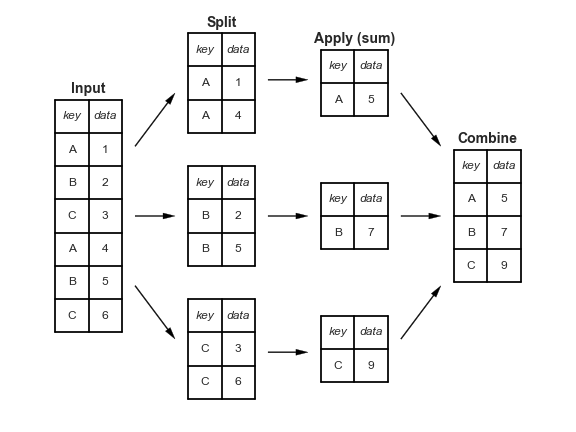

Let's put this concept into practice using the pandas function [.groupby()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). It's one of the most useful pandas functions!

In [271]:
year = 2020
station_code = '72530094846'

base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access' 
url_station = f"{base_url}/{str(year)}/{station_code}.csv"

chicago_ohare = pd.read_csv(url_station)
chicago_ohare.head()

/Users/samanthalapp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (45,46,50,55,59,60,61,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


STATION                 DATE  SOURCE  LATITUDE  LONGITUDE  ELEVATION  \
0  72530094846  2020-01-01T00:00:00       4  41.96019  -87.93162      201.8   
1  72530094846  2020-01-01T00:51:00       7  41.96019  -87.93162      201.8   
2  72530094846  2020-01-01T01:51:00       7  41.96019  -87.93162      201.8   
3  72530094846  2020-01-01T02:05:00       7  41.96019  -87.93162      201.8   
4  72530094846  2020-01-01T02:51:00       7  41.96019  -87.93162      201.8   

                                         NAME REPORT_TYPE CALL_SIGN  \
0  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-12     99999   
1  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-15     KORD    
2  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-15     KORD    
3  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-16     KORD    
4  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-15     KORD    

  QUALITY_CONTROL  ...              OD1  OE1  OE2  OE3  RH1  RH2  RH3  WA1  \
0            V020  ...  4,99,0108,1,999  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                 REM               EQD  
0  SYN09272530 32566 82612 11022 21061 39850 4009...               NaN  
1  MET11112/31/19 18:51:03 METAR KORD 010051Z 260...               NaN  
2  MET10412/31/19 19:51:03 METAR KORD 010151Z 260...               NaN  
3  MET09712/31/19 20:05:03 SPECI KORD 010205Z 260...  D01      0ADE726  
4  MET10712/31/19 20:51:03 METAR KORD 010251Z 250...  D01      0ADE726  

[5 rows x 106 columns]

We can change columns in a more programatic way instead of using `rename`. This is useful when you have a lot of columns, as this case. 

In [272]:
## Note that .lower() converts everything into lowercase

chicago_ohare.columns = [str(col).lower() for col in chicago_ohare.columns.tolist()]
chicago_ohare.head()


station                 date  source  latitude  longitude  elevation  \
0  72530094846  2020-01-01T00:00:00       4  41.96019  -87.93162      201.8   
1  72530094846  2020-01-01T00:51:00       7  41.96019  -87.93162      201.8   
2  72530094846  2020-01-01T01:51:00       7  41.96019  -87.93162      201.8   
3  72530094846  2020-01-01T02:05:00       7  41.96019  -87.93162      201.8   
4  72530094846  2020-01-01T02:51:00       7  41.96019  -87.93162      201.8   

                                         name report_type call_sign  \
0  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-12     99999   
1  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-15     KORD    
2  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-15     KORD    
3  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-16     KORD    
4  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US       FM-15     KORD    

  quality_control  ...              od1  oe1  oe2  oe3  rh1  rh2  rh3  wa1  \
0            V020  ...  4,99,0108,1,999  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4            V030  ...              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                 rem               eqd  
0  SYN09272530 32566 82612 11022 21061 39850 4009...               NaN  
1  MET11112/31/19 18:51:03 METAR KORD 010051Z 260...               NaN  
2  MET10412/31/19 19:51:03 METAR KORD 010151Z 260...               NaN  
3  MET09712/31/19 20:05:03 SPECI KORD 010205Z 260...  D01      0ADE726  
4  MET10712/31/19 20:51:03 METAR KORD 010251Z 250...  D01      0ADE726  

[5 rows x 106 columns]

### 3.1 Data filtering (review)

In [273]:
## I recommend naming subsets of a dataframe something other than the full set name

chicago_ohare_0 = chicago_ohare[chicago_ohare.report_type == 'FM-15']

In [274]:
chicago_ohare_0 = chicago_ohare_0.filter(['station', 'date', 'name', 'tmp'])

chicago_ohare_0.head()


station                 date  \
1  72530094846  2020-01-01T00:51:00   
2  72530094846  2020-01-01T01:51:00   
4  72530094846  2020-01-01T02:51:00   
5  72530094846  2020-01-01T03:51:00   
6  72530094846  2020-01-01T04:51:00   

                                         name      tmp  
1  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -0022,5  
2  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -0022,5  
4  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -0028,5  
5  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -0033,5  
6  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -0033,5

In [275]:
## I could also get the same result above by using the simple slicing technique we learned above

#chicago_ohare = chicago_ohare[['station','date','name','tmp']]

### 3.2. Data cleaning/processing: .apply(lambda x: f(x), axis = 1)


All seems good, but `tmp` seems weird. Reading the documentation we see that `tmp` has data, but also a quality assurance value that is appened to the data. On top of that, the temperature is also in a 100-scale, so we need to divide it by 100

In [276]:
## This is one of the most important cells in this notebook!

chicago_ohare_0['tmp'].apply(lambda x: float(str(x).split(',')[0])/10)

1       -2.2
2       -2.2
4       -2.8
5       -3.3
6       -3.3
        ... 
12715   -2.2
12717   -1.7
12718   -1.7
12719   -2.2
12720   -3.9
Name: tmp, Length: 8784, dtype: float64

In [277]:
## Let's look at one more example of .apply():
## Consider a case where we want, for whatever reason, elevation in km instead of m

def convert2km(elev):
    #where elev is in meters
    return elev/1000

## Now let's make a new column with our elevation in km:

chicago_ohare['elevation_km'] = chicago_ohare.apply(lambda x: convert2km(x.elevation), axis = 1)


The function you apply with .apply() can be a function of multiple columns:



#### Check-in [#4]


Starting with the test_df below, add a column that contains the greater value (i.e. compare A and B, and assign the greater of the two to a third column).

In [278]:
test_df = pd.DataFrame({'A':[9,9,8,2,3,4,5,1,1,1], 'B':[3,5,8,9,6,5,3,2,5,5]})

In [279]:
"""
Use this cell to code the answer to the question. 
"""

#### Life lesson [# 1]: always check your data types 

Timestamps also seem to be weird, we can use our `datatime (dt)` methods to deal with this timestamps. Here, we can normalize the timestamp to the closest hour.

In [281]:
chicago_ohare['date'].dt.floor('1H')

AttributeError: Can only use .dt accessor with datetimelike values

What happened here? Any ideas? 

In [282]:
pd.to_datetime(chicago_ohare['date']).dt.floor('1H')

0       2020-01-01 00:00:00
1       2020-01-01 00:00:00
2       2020-01-01 01:00:00
3       2020-01-01 02:00:00
4       2020-01-01 02:00:00
                ...        
12716   2020-12-31 20:00:00
12717   2020-12-31 20:00:00
12718   2020-12-31 21:00:00
12719   2020-12-31 22:00:00
12720   2020-12-31 23:00:00
Name: date, Length: 12721, dtype: datetime64[ns]

In [283]:
pd.to_datetime(chicago_ohare['date']).dt.round('60min')

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 02:00:00
4       2020-01-01 03:00:00
                ...        
12716   2020-12-31 21:00:00
12717   2020-12-31 21:00:00
12718   2020-12-31 22:00:00
12719   2020-12-31 23:00:00
12720   2021-01-01 00:00:00
Name: date, Length: 12721, dtype: datetime64[ns]

**AMAZING**

#### Life Lesson [# 2] - How to clean data efficiently

Standarize your data cleaning processes, this is helpful for several reasons:
 - Apply same cleaning to similar `DataFrames`
 - Split big big `DataFrames` and clean them all in parallel! 


In [284]:
from urllib.parse import urljoin

def clean_noaa_station_df(df,
                         time_period=None):
    """Clean station year reports coming from NOAA-ISD

    Parameters:
     - df pd.DataFrame object with raw data
     - time_period list with strings of dates to filter the raw data

    Return:
    pd.DataFrame
    """

    df.columns = [str(col).lower() for col in df.columns.tolist()]
    keep_columns = ['tmp', 'station', 'date', 'name']
    report_type = 'FM-15'

    try:
        df['date'] = pd.to_datetime(df['date']).dt.round('60min')
        df = df[df.report_type == report_type]
        df.set_index('date', inplace=True)

        if time_period is not None:
            df_filter = df.loc[time_period[0]:time_period[1]]
        else:
            df_filter = df

        df_filter = df_filter.filter(keep_columns)
        df_filter['tmp'] = df_filter['tmp'].apply(
            lambda x: float(str(x).split(',')[0])/10
        )

        df_filter = df_filter[df_filter['tmp'] != 999.9]
        df_filter.reset_index(inplace=True,
                            drop=False)
        
        df_filter = df_filter.drop_duplicates(["date", "station"])

    except Exception as e:
        print(f'Error during cleaning: {e}')

    return df_filter

'''
Run our function for a list of functions:

 - Notice the use of list comprehensions to facilitate the process and
   avoid looping -- is usually hard to read.
'''

year = 2020
station_codes = ['72530094846', '72534014819']
base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access' 

raw_data = [pd.read_csv(f"{base_url}/{str(year)}/{station_code}.csv",
                        dtype='str') 
           for station_code in station_codes]

clean_data = [clean_noaa_station_df(data) for data in raw_data]

chicago_weather = pd.concat(clean_data)
chicago_weather

date  tmp      station  \
0    2020-01-01 01:00:00 -2.2  72530094846   
1    2020-01-01 02:00:00 -2.2  72530094846   
2    2020-01-01 03:00:00 -2.8  72530094846   
3    2020-01-01 04:00:00 -3.3  72530094846   
4    2020-01-01 05:00:00 -3.3  72530094846   
...                  ...  ...          ...   
8775 2020-12-31 20:00:00 -1.7  72534014819   
8776 2020-12-31 21:00:00 -1.7  72534014819   
8777 2020-12-31 22:00:00 -1.7  72534014819   
8778 2020-12-31 23:00:00 -2.8  72534014819   
8779 2021-01-01 00:00:00 -3.3  72534014819   

                                            name  
0     CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  
1     CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  
2     CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  
3     CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  
4     CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  
...                                          ...  
8775               CHICAGO MIDWAY AIRPORT, IL US  
8776               CHICAGO MIDWAY AIRPORT, IL US  
8777               CHICAGO MIDWAY AIRPORT, IL US  
8778               CHICAGO MIDWAY AIRPORT, IL US  
8779               CHICAGO MIDWAY AIRPORT, IL US  

[17561 rows x 4 columns]

### 3.3 Let's `groupby`

When grouping by we are dividing our data by one or several variables and then applying a function to it. Most of the times, we are aggregating data and we have a set of predefined functions to apply to each of our groups (i.e. `mean()`, `min()`, `max()`, `last()`, `first()` etc.)

For instance, we can calculate the `mean` temperature for our two stations in the city. 

In [285]:
chicago_weather.groupby('station').tmp.mean()

station
72530094846    11.772668
72534014819    11.832403
Name: tmp, dtype: float64

#### Check-in [# 4]

You can run several aggregation functions (we will see that later). `Pandas` has a trick under the sleeve for this. Try the follwing: 

```
chicago_weather.groupby('station').describe()
```

What happens?

In [286]:
"""
Use this code cell to answer the question.
Literally, just copy and paste ;)
"""


'\nUse this code cell to answer the question.\nLiterally, just copy and paste ;)\n'

`describe()` is cool, but you don't have much control over the operations or their order. You can use `agg` to pass several operations. Notice that you can use `pandas` methods by passing a string function, or you can use other predefined functions (like `np.median`)

In [287]:
chicago_weather.groupby('station').tmp.agg(mean='mean',
                                           median=np.median,
                                           min='min',
                                           max='max')

mean  median   min   max
station                                   
72530094846  11.772668    10.6 -18.9  36.1
72534014819  11.832403    10.6 -18.3  35.0

#### Check-in [# 5]

What's the standard deviation and variance of temperature for both station across the year?

In [288]:
"""
Use this code cell to code to answer the question above.
"""


'\nUse this code cell to code to answer the question above.\n'

Below the hood `groupby` is creating an iterator of dataframes splitted by the grouping key. We can use this object in a loop and make calculations:

In [289]:
for g, df in chicago_weather.groupby(['station']):
    print(f'Group {g} has shape: {df.shape}')

Group 72530094846 has shape: (8781, 4)
Group 72534014819 has shape: (8780, 4)


### 3.4 Let's `groupby` using time

You can also apply more complex operations and group by using time. `pandas` is powerful enough to use the `date` columnn to calculate different grouping windows. We have two options when using time: `resample` and `Grouper`. 

In [290]:
chicago_weather['tmp_demean'] = chicago_weather.groupby('station').tmp.transform(lambda x: x - x.mean())
chicago_weather.head()

date  tmp      station  \
0 2020-01-01 01:00:00 -2.2  72530094846   
1 2020-01-01 02:00:00 -2.2  72530094846   
2 2020-01-01 03:00:00 -2.8  72530094846   
3 2020-01-01 04:00:00 -3.3  72530094846   
4 2020-01-01 05:00:00 -3.3  72530094846   

                                         name  tmp_demean  
0  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668  
1  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668  
2  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -14.572668  
3  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668  
4  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668

In [291]:
chicago_weather.set_index('date').resample('M').tmp.mean()

date
2020-01-31    -0.553432
2020-02-29    -1.001653
2020-03-31     5.464382
2020-04-30     8.661779
2020-05-31    15.350706
2020-06-30    23.190347
2020-07-31    26.221318
2020-08-31    24.701345
2020-09-30    19.070535
2020-10-31    10.761358
2020-11-30     8.682974
2020-12-31     0.671438
2021-01-31    -3.600000
Freq: M, Name: tmp, dtype: float64

`resample` relies on the `Index` of the `DataFrame` to calculate aggregations. This is why we first use `set_index` to tell pandas to index our data by `date`. Sometimes we don't want to index our data, so `Grouper` has our backs.

In [323]:
chicago_weather.groupby(pd.Grouper(key='date', freq='M')).tmp.quantile()

date
2020-01-31     0.0
2020-02-29    -0.6
2020-03-31     5.0
2020-04-30     7.8
2020-05-31    15.0
2020-06-30    23.3
2020-07-31    26.1
2020-08-31    24.4
2020-09-30    18.9
2020-10-31    10.0
2020-11-30     6.7
2020-12-31     1.1
2021-01-31    -3.6
Freq: M, Name: tmp, dtype: float64

#### Check-in [# 6]

Calculate the `max` monthly temperature for each station. 

_Hint: you can pass a list to `groupby`_

In [321]:
"""
Use this code block to answer the question
"""



date
2020-01-31    10.0
2020-02-29    12.8
2020-03-31    19.4
2020-04-30    26.7
2020-05-31    33.3
2020-06-30    34.4
2020-07-31    35.6
2020-08-31    36.1
2020-09-30    31.1
2020-10-31    27.8
2020-11-30    25.0
2020-12-31    13.9
2021-01-31    -3.3
Freq: M, Name: tmp, dtype: float64

### 3.5 Advanced `groupby`

Sometimes we want to execute more complex functions in time where the aggregation might change. A good example of this are the rolling windows where the group changes with time.

In [295]:
chicago_weather.groupby(['station'])['tmp'].rolling(10, win_type='boxcar', min_periods=1).mean()

## win_type stands for window type. You can find other window types here: 
## https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows



station          
72530094846  0      -2.200
             1      -2.200
             2      -2.400
             3      -2.625
             4      -2.760
                     ...  
72534014819  8775   -3.590
             8776   -3.320
             8777   -3.050
             8778   -2.890
             8779   -2.780
Name: tmp, Length: 17561, dtype: float64

In [296]:
chicago_weather['rolling'] = chicago_weather.groupby(['station'])['tmp'].\
rolling(5, win_type='boxcar', center=True).\
mean().reset_index(drop=True)
chicago_weather.head(10)

date  tmp      station  \
0 2020-01-01 01:00:00 -2.2  72530094846   
1 2020-01-01 02:00:00 -2.2  72530094846   
2 2020-01-01 03:00:00 -2.8  72530094846   
3 2020-01-01 04:00:00 -3.3  72530094846   
4 2020-01-01 05:00:00 -3.3  72530094846   
5 2020-01-01 06:00:00 -3.9  72530094846   
6 2020-01-01 07:00:00 -4.4  72530094846   
7 2020-01-01 08:00:00 -5.0  72530094846   
8 2020-01-01 09:00:00 -5.6  72530094846   
9 2020-01-01 10:00:00 -6.1  72530094846   

                                         name  tmp_demean  rolling  
0  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668      NaN  
1  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668      NaN  
2  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -14.572668    -2.76  
3  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668    -3.10  
4  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668    -3.54  
5  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.672668    -3.98  
6  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -16.172668    -4.44  
7  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -16.772668    -5.00  
8  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -17.372668    -5.44  
9  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -17.872668    -5.78

### 3.6 Transform data 

When we aggregate data we are usually reducing its dimensions. Like in the examples above, we went from serveral hundreds of rows to only two, one per group. But we can also use group by operations to create new columns. We have seen this before when we calculate anomalies in our data in the Section I. 

In [297]:
chicago_weather.groupby('station').tmp.transform(lambda x: x - x.mean())

0      -13.972668
1      -13.972668
2      -14.572668
3      -15.072668
4      -15.072668
          ...    
8775   -13.532403
8776   -13.532403
8777   -13.532403
8778   -14.632403
8779   -15.132403
Name: tmp, Length: 17561, dtype: float64

### 4.3 Merge data
 
Sometimes we have different data sources of related data. In our base case we have a dataframe of stations with station metadata and another dataframe with actual temperature data. We can combine data frames using common keys by `merging` data frames. 

There are two ways of combining datasets: 
 - Along columns: `merge()`
 - Along rows: `pd.concat()`

In [303]:
chicago_weather_metadata = chicago_weather.merge(stations_il,
                                                 left_on=['station'],
                                                 right_on=['station_code'])
chicago_weather_metadata.head()

date  tmp      station  \
0 2020-01-01 01:00:00 -2.2  72530094846   
1 2020-01-01 02:00:00 -2.2  72530094846   
2 2020-01-01 03:00:00 -2.8  72530094846   
3 2020-01-01 04:00:00 -3.3  72530094846   
4 2020-01-01 05:00:00 -3.3  72530094846   

                                         name  tmp_demean  rolling  \
0  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668      NaN   
1  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668      NaN   
2  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -14.572668    -2.76   
3  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668    -3.10   
4  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668    -3.54   

  start_date_service station_code    usaf   wban  \
0         1946-10-01  72530094846  725300  94846   
1         1946-10-01  72530094846  725300  94846   
2         1946-10-01  72530094846  725300  94846   
3         1946-10-01  72530094846  725300  94846   
4         1946-10-01  72530094846  725300  94846   

                           station_name country state icao_code      lat  \
0  CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
1  CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
2  CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
3  CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
4  CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   

        lon elevation end_date_service        age  
0  -087.932   +0204.8       2022-08-28  75.908472  
1  -087.932   +0204.8       2022-08-28  75.908472  
2  -087.932   +0204.8       2022-08-28  75.908472  
3  -087.932   +0204.8       2022-08-28  75.908472  
4  -087.932   +0204.8       2022-08-28  75.908472

### Check-in [# 7]

1. Get the last temperature data for the two stations 
2. Merge the last hour data with the metadata `DataFrame`

_HINT_: Remember `last()`.

In [299]:
chicago_weather_metadata

date  tmp      station  \
0     2020-01-01 01:00:00 -2.2  72530094846   
1     2020-01-01 02:00:00 -2.2  72530094846   
2     2020-01-01 03:00:00 -2.8  72530094846   
3     2020-01-01 04:00:00 -3.3  72530094846   
4     2020-01-01 05:00:00 -3.3  72530094846   
...                   ...  ...          ...   
17556 2020-12-31 20:00:00 -1.7  72534014819   
17557 2020-12-31 21:00:00 -1.7  72534014819   
17558 2020-12-31 22:00:00 -1.7  72534014819   
17559 2020-12-31 23:00:00 -2.8  72534014819   
17560 2021-01-01 00:00:00 -3.3  72534014819   

                                             name  tmp_demean  rolling  \
0      CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668      NaN   
1      CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -13.972668      NaN   
2      CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -14.572668    -2.76   
3      CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668    -3.10   
4      CHICAGO OHARE INTERNATIONAL AIRPORT, IL US  -15.072668    -3.54   
...                                           ...         ...      ...   
17556               CHICAGO MIDWAY AIRPORT, IL US  -13.532403    -2.88   
17557               CHICAGO MIDWAY AIRPORT, IL US  -13.532403    -2.34   
17558               CHICAGO MIDWAY AIRPORT, IL US  -13.532403    -2.12   
17559               CHICAGO MIDWAY AIRPORT, IL US  -14.632403    -2.34   
17560               CHICAGO MIDWAY AIRPORT, IL US  -15.132403      NaN   

      start_date_service station_code    usaf   wban  \
0             1946-10-01  72530094846  725300  94846   
1             1946-10-01  72530094846  725300  94846   
2             1946-10-01  72530094846  725300  94846   
3             1946-10-01  72530094846  725300  94846   
4             1946-10-01  72530094846  725300  94846   
...                  ...          ...     ...    ...   
17556         1973-01-01  72534014819  725340  14819   
17557         1973-01-01  72534014819  725340  14819   
17558         1973-01-01  72534014819  725340  14819   
17559         1973-01-01  72534014819  725340  14819   
17560         1973-01-01  72534014819  725340  14819   

                               station_name country state icao_code      lat  \
0      CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
1      CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
2      CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
3      CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
4      CHICAGO O'HARE INTERNATIONAL AIRPORT      US    IL      KORD  +41.960   
...                                     ...     ...   ...       ...      ...   
17556              CHICAGO MIDWAY INTL ARPT      US    IL      KMDW  +41.784   
17557              CHICAGO MIDWAY INTL ARPT      US    IL      KMDW  +41.784   
17558              CHICAGO MIDWAY INTL ARPT      US    IL      KMDW  +41.784   
17559              CHICAGO MIDWAY INTL ARPT      US    IL      KMDW  +41.784   
17560              CHICAGO MIDWAY INTL ARPT      US    IL      KMDW  +41.784   

            lon elevation end_date_service        age  
0      -087.932   +0204.8       2022-08-28  75.908472  
1      -087.932   +0204.8       2022-08-28  75.908472  
2      -087.932   +0204.8       2022-08-28  75.908472  
3      -087.932   +0204.8       2022-08-28  75.908472  
4      -087.932   +0204.8       2022-08-28  75.908472  
...         ...       ...              ...        ...  
17556  -087.755   +0185.8       2022-08-28  49.654681  
17557  -087.755   +0185.8       2022-08-28  49.654681  
17558  -087.755   +0185.8       2022-08-28  49.654681  
17559  -087.755   +0185.8       2022-08-28  49.654681  
17560  -087.755   +0185.8       2022-08-28  49.654681  

[17561 rows x 19 columns]

In [304]:
chicago_weather.groupby('station').last()

date  tmp                                        name  \
station                                                                   
72530094846 2021-01-01 -3.9  CHICAGO OHARE INTERNATIONAL AIRPORT, IL US   
72534014819 2021-01-01 -3.3               CHICAGO MIDWAY AIRPORT, IL US   

             tmp_demean  rolling  
station                           
72530094846  -15.672668    -1.70  
72534014819  -15.132403    -2.34

In [301]:
"""
Use this code chunk to work on this
"""

'\nUse this code chunk to work on this\n'